# Project: Investigating The Movie Database (TmDb) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**This data set contains information about 10,000 movies from year 1966 to 2015. It was collected from The Movie Database (tmdb), including user ratings and revenue.**
> Some questions that we can analyse from this data set include:
    1. Averge Runtime of Movies.
    2. Year of release vs Profitability. 
    3. Finding characterstics of successful movies.

In [1]:
# import statements for all of the packages 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
### General Properties

**Loading the data file.**

In [2]:
filename = '/Users/shubhamsamant/Desktop/Project_Explore_Dataset/tmdb-movies.csv'
df = pd.read_csv(filename)

**Inspecting the Data in Pandas dataframe**

In [3]:
print ("Total number of rows =",len(df))
df.head(3)

Total number of rows = 10866


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


**Inspecting the Column names & their data type**

In [4]:
print ("Total Number of columns =",len(df.columns),'\n')
df.dtypes

Total Number of columns = 21 



id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**Inspecting the first row from the Data** ( i.e the 1st index of DataFrame )

In [5]:
df.iloc[0]

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

### Data Cleaning 


**1. Creating a new DataFrame by including most relevent columns.**<br><br>
Selected Columns include:<br> 'original_title' , 'cast' , 'genres' , 'revenue' , 'director', 'budget' , 'runtime'

In [6]:
tmdb_df = df[['release_date','release_year','original_title','cast','genres','revenue','director','budget','runtime']].copy()

** 2. Removing any duplicate rows.**

In [7]:
tmdb_df.drop_duplicates(keep ='first', inplace=True)

** 3. Converting the **'release_date'** column to standard date format. **

In [8]:
tmdb_df.release_date = pd.to_datetime(tmdb_df['release_date'])

**4. Removing all 0 from **'budget'** & **'revenue'** columns**

In [9]:
# creating a list of revenue column and budget column called 'br_list'
br_list=['budget', 'revenue']

# replacing all the values from '0' to NAN in the 'br_list'
tmdb_df[br_list] = tmdb_df[br_list].replace(0, np.NAN)

# Removing all the row which has NaN value in 'br_list' 
tmdb_df.dropna(subset = br_list, inplace = True)

**5. Replacing zero with NAN in **'runtime'** column.**

In [10]:
tmdb_df['runtime'] = tmdb_df['runtime'].replace(0, np.NAN)

**6. Changing format of budget and revenue column.**

In [11]:
select_column=['budget', 'revenue']
tmdb_df[select_column] = tmdb_df[select_column].applymap(np.int64)

**Printing the cleaned DataFrame**

In [12]:
print (tmdb_df.dtypes)
tmdb_df.head()

release_date      datetime64[ns]
release_year               int64
original_title            object
cast                      object
genres                    object
revenue                    int64
director                  object
budget                     int64
runtime                    int64
dtype: object


,release_date,release_year,original_title,cast,genres,revenue,director,budget,runtime
0,2015-06-09,2015,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,1513528810,Colin Trevorrow,150000000,124
1,2015-05-13,2015,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,378436354,George Miller,150000000,120
2,2015-03-18,2015,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,295238201,Robert Schwentke,110000000,119
3,2015-12-15,2015,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2068178225,J.J. Abrams,200000000,136
4,2015-04-01,2015,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,1506249360,James Wan,190000000,137


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Average Runtime of movies 

In [13]:
mean_runtime = tmdb_df['runtime'].mean()
print ("mean runtime of movies =",mean_runtime,'minutes')

mean runtime of movies = 109.22029060716139 minutes


**Lets analyse it in a visual form i.e. by a histogram**

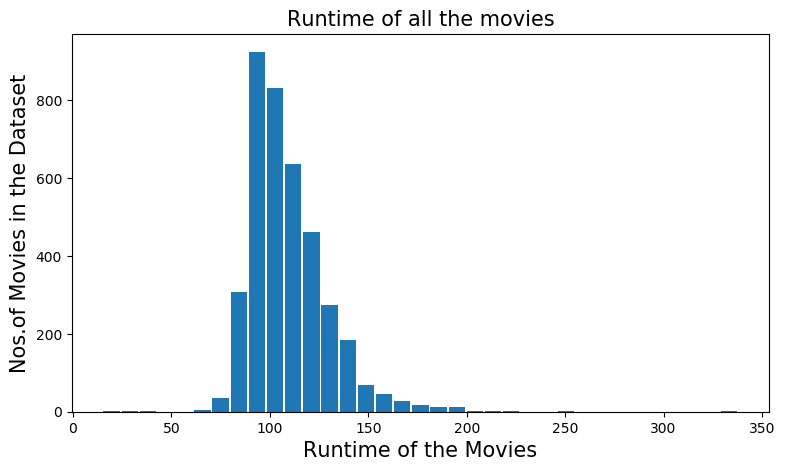

In [14]:
# giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

# On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)

# On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)

# Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

# giving a histogram plot
plt.hist(tmdb_df['runtime'], rwidth = 0.9, bins =35)

# displays the plot
plt.show()

**Most of the movies are timed between 80 to 115 minutes. Almost 1000 movies fall in this criteria.**

Lets analyse more about runtime of the movies, using a Box Plot

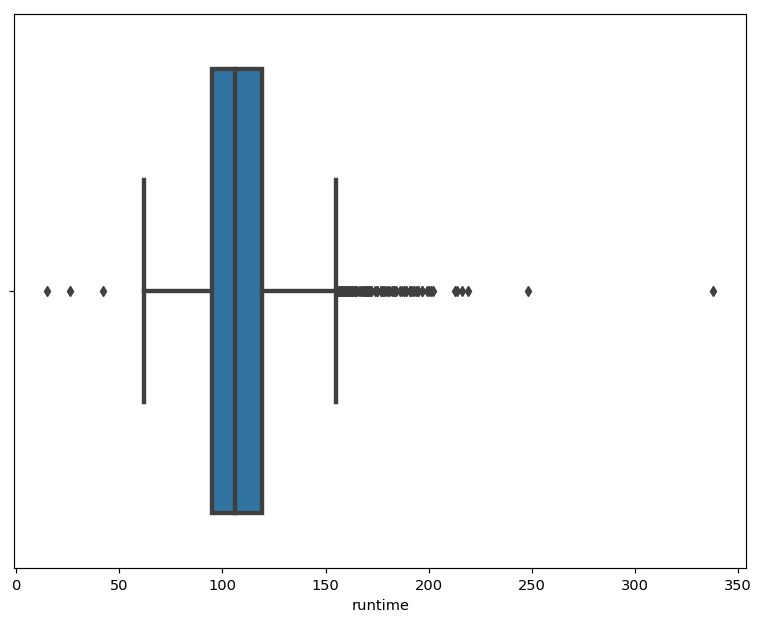

In [15]:
# Box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

# Using seaborn to generate the boxplot
sns.boxplot(tmdb_df['runtime'], linewidth = 3)

# Diplay the plot
plt.show()

**Box-plot gives us an overall idea about the spread in the distribution of runtime of movies.**

Swarm-Plot to analyse data points plot of runtime of movies

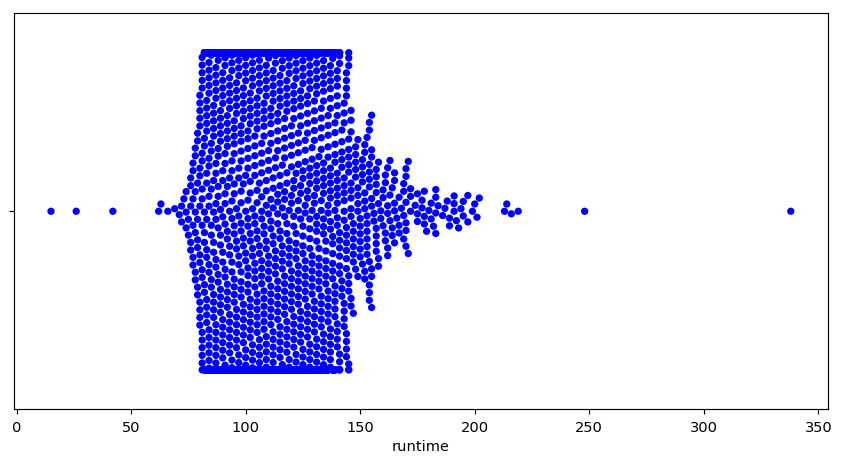

In [16]:
plt.figure(figsize=(10,5), dpi = 105)

# using seaborn to generate the plot
sns.swarmplot(tmdb_df['runtime'], color = 'blue')

# displaying the plot
plt.show()

**This plot gives us a visual of complete distribution for runtime of movies by, plotting points againts their respective position, in the ditribution.**

Let's compute some specific statistics from the runtime of movies.

In [17]:
tmdb_df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

**By looking at the plots and calculations, we can say** <br>

**25% of movies have runtime less than 95 minutes <br>
50% of movies have runtime less than 109 minutes. (i.e median) <br>
75% of movies have runtime less than 119 minutes**

### Research Question 2: Year of release vs Profitability 

Calculating the profit of the each movie

In [18]:
# insert(column index, column name, value)
tmdb_df.insert(4,'profit_earned',tmdb_df['revenue']-tmdb_df['budget'])

Sum up all the movies of a particular year.

In [19]:
p_year = tmdb_df.groupby('release_year')['profit_earned'].sum()

Let's find which year made the highest profit

In [20]:
print("Year of highest Profit =",p_year.idxmax())

Year of highest Profit = 2015


Let's analyse our data on a Line-plot.

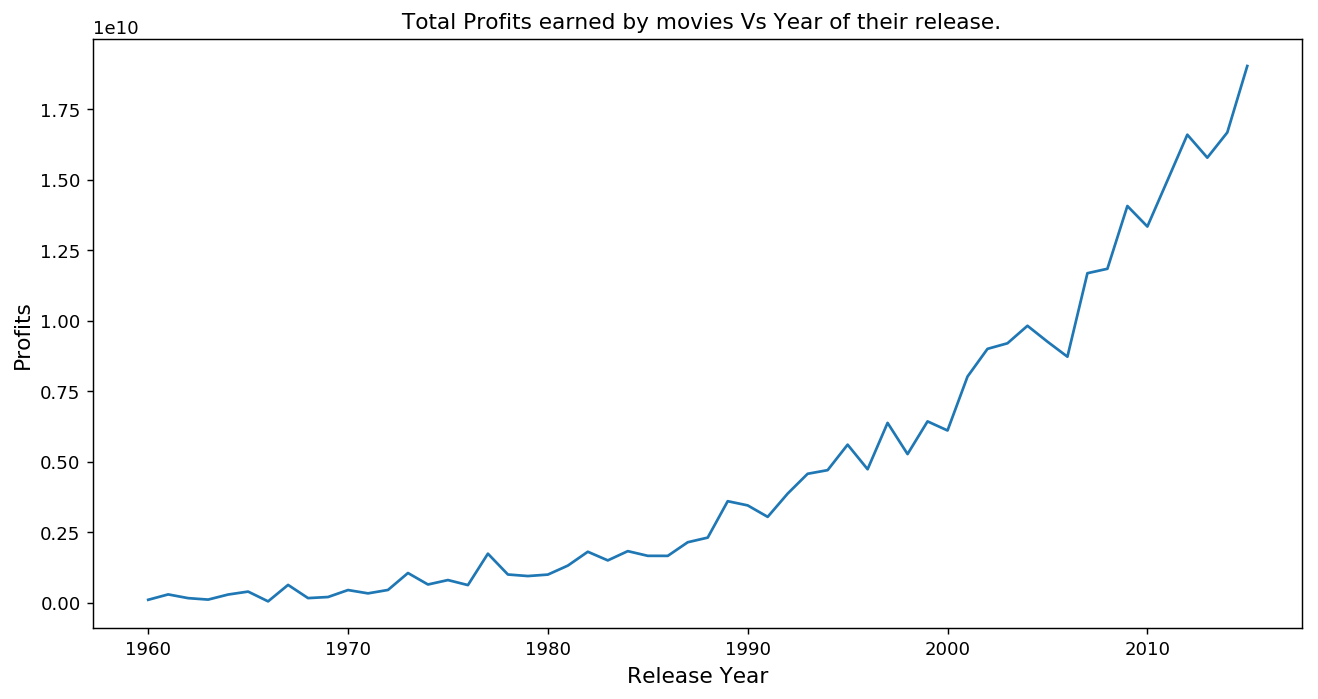

In [21]:
#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#plotting the graph
plt.plot(p_year)

#on x-axis
plt.xlabel('Release Year', fontsize = 12)

#on y-axis
plt.ylabel('Profits', fontsize = 12)

#title of the line plot
plt.title(' Total Profits earned by movies Vs Year of their release.')

#displaying the line plot
plt.show()

**We can conclude both graphically as well as by calculations that in 2015 movies made highest profits.**

### Research Question 3: Finding out characterstics of successful movies (genre, cast, budget, duration, revenue)

For this analysis, we will be considering only those movies who have earned a profit of, more than 50 million.

In [22]:
# selecting the movies having profit $50M or more
profit_data = tmdb_df[tmdb_df['profit_earned'] >= 50000000]

# reindexing new data
profit_data.index = range(len(profit_data))

# we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

Printing the updated dataset

In [23]:
profit_data.head(3)

,release_date,release_year,original_title,cast,profit_earned,genres,revenue,director,budget,runtime
1,2015-06-09,2015,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,1363528810,Action|Adventure|Science Fiction|Thriller,1513528810,Colin Trevorrow,150000000,124
2,2015-05-13,2015,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,228436354,Action|Adventure|Science Fiction|Thriller,378436354,George Miller,150000000,120
3,2015-03-18,2015,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,185238201,Adventure|Science Fiction|Thriller,295238201,Robert Schwentke,110000000,119


Counting the number of rows in the new dataset

In [24]:
len(profit_data)

1338

**Dataset reduced to 1338 records from 3853 records.**

Creating a helper function which will take a column and process as required.

In [25]:
def data(column):
    
    # will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    # giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    # arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

**Finding the top genres**

In [26]:
top_genres = data('genres')
top_genres.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

Plotting the points in descending order (same as in data format) 

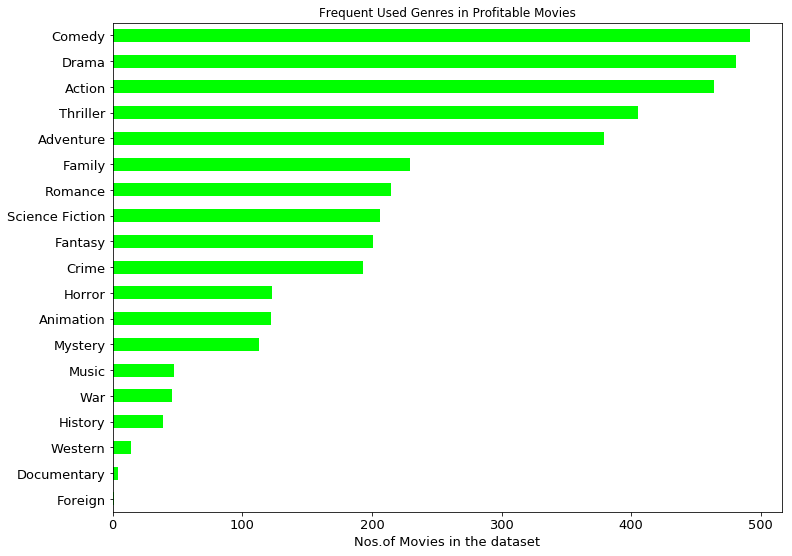

In [34]:
top_genres.sort_values(ascending = True, inplace = True)

# ploting
lt = top_genres.plot.barh(color = '#00FF00', fontsize = 13)

# title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

# figure size(width, height)
lt.figure.set_size_inches(12, 9)

# ploting the graph
plt.show()

**Finding the top casts**

In [27]:
top_casts = data('cast')
top_casts.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

**Finding average budget of these high profit  movies.**

In [28]:
profit_data['budget'].mean()

60444957.76083707

**Finding average runtime of these high profit  movies.**

In [29]:
profit_data['runtime'].mean()

113.66741405082212

**Finding average revenue of these high profit movies.**

In [30]:
profit_data['revenue'].mean()

254957662.59491777

Average budget of successful movies = 60,444,957.76 <br>
Average runtime of successful movies. = 113.66 minutes <br>
Average revenue of successful movies. = 254,957,662.59 <br>

<a id='conclusions'></a>
## Conclusions

** From our analysis we found out the following results ** <br>
1. Most of the movies are timed between 1 hour 15 mins to 1 hour 50 minutes. <br><br>
2. Year when the movies hit the highest Profit = 2015. <br><br>
3. For a movie to be successful<br><br>
    Follwing should be in cast - Tom Cruise or Brad Pitt or Tom Hanks or Sylvester Stallone or Cameron Diaz<br>
    Genre must be : Action, Adventure, Thriller, Comedy, Drama. <br>
    Average Budget must be around 60 millon dollars<br>
    Average duration of the movie must be 113 minutes



**Limitations**<br>
1. We are not sure if the data provided to us is completely corect and up-to-date. <br><br>
2. As we cleaned all the 0's from the budget and revenue columns, we lost almost 60% of the data, from these columns. This definately means our analysis, from the given dataset, cannot predict true profits made per year by the movies. <br><br>
3. Budget and revenue column do not have currency units, it might be possible different movies have budget in different currency according to the countries in which they are produced. <br><br>
 